<h1>Project 1</h1>
<hr>
<h2>Road Traffic Severity Classification</h2>
This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms.

In [1]:
#libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
from autoviz import data_cleaning_suggestions

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'
%matplotlib inline

Imported v0.1.58. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


In [2]:
#Open the dataset
df = pd.read_csv('../datasets/RTA Dataset.csv')

<hr>
<h2>EDA</h2>
<hr>

In [3]:
#shape and head
df.shape

(12316, 32)

In [4]:
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [5]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


In [6]:
#duplicates
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


In [7]:
#describe, numeric and categorical columns
df.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [8]:
# to include categorical columns
df.describe(include=['O']).T

count unique  \
Time                     12316   1074   
Day_of_week              12316      7   
Age_band_of_driver       12316      5   
Sex_of_driver            12316      3   
Educational_level        11575      7   
Vehicle_driver_relation  11737      4   
Driving_experience       11487      7   
Type_of_vehicle          11366     17   
Owner_of_vehicle         11834      4   
Service_year_of_vehicle   8388      6   
Defect_of_vehicle         7889      3   
Area_accident_occured    12077     14   
Lanes_or_Medians         11931      7   
Road_allignment          12174      9   
Types_of_Junction        11429      8   
Road_surface_type        12144      5   
Road_surface_conditions  12316      4   
Light_conditions         12316      4   
Weather_conditions       12316      9   
Type_of_collision        12161     10   
Vehicle_movement         12008     13   
Casualty_class           12316      4   
Sex_of_casualty          12316      3   
Age_band_of_casualty     12316      6   
Casualty_severity        12316      4   
Work_of_casuality         9118      7   
Fitness_of_casuality      9681      5   
Pedestrian_movement      12316      9   
Cause_of_accident        12316     20   
Accident_severity        12316      3   

                                                                      top  \
Time                                                             15:30:00   
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                Automobile   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                               No defect   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Time                       120  
Day_of_week               2041  
Age_band_of_driver        4271  
Sex_of_driver            11437  
Educational_level         7619  
Vehicle_driver_relation   9627  
Driving_experience        3363  
Type_of_vehicle           3205  
Owner_of_vehicle         10459  
Service_year_of_vehicle   2883  
De

In [9]:
#let's review what are the distinct values for each column, in order to detect nulls masked as strings
for col in df.columns:
    print('distinct values in ',col )
    print(df[col].unique(),'\n')
    print('----------------------------------------------------')

distinct values in  Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

----------------------------------------------------
distinct values in  Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

----------------------------------------------------
distinct values in  Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

----------------------------------------------------
distinct values in  Sex_of_driver
['Male' 'Female' 'Unknown'] 

----------------------------------------------------
distinct values in  Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

----------------------------------------------------
distinct values in  Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' nan 'Other'] 

----------------------------------------------------
distinct values in  Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '

For the next "preprocessing" stage, must be careful with :
<hr>
Features with NA values as string:
<ul>
    <li>Casualty_class</li>
    <li>Sex_of_casualty</li>
    <li>Age_band_of_casualty</li>
    <li>Casualty_severity</li>
</ul>
<hr>
Features with a class 'unknown' and also NAN values, like 
<ul>
    <li>Educational_level</li>
    <li>Vehicle_driver_relation</li>
    <li>Driving_experience</li>
    <li>Type_of_collision</li>
</ul>
<hr>
Fitness_of_casuality Feature, what has a mispelled class, fix it before encoding



In [10]:
#let's standarize some features, before to proceed with the EDA
#Eliminate spaces and upper cases from name columns
df.columns=df.columns.str.lower().str.replace(' ', '_')

In [11]:
#lets change the column 'time' into time_hour. I decided to not use the minutes part
def separaHoras(stringTime):
    lstTime = stringTime.split(':')
    return lstTime[0]

df['time_hours'] = df['time'].apply(separaHoras)

In [12]:
#From now on. I am going to use time_hour
df.drop('time',axis=1,inplace=True)

In [13]:
df.dtypes


day_of_week                    object
age_band_of_driver             object
sex_of_driver                  object
educational_level              object
vehicle_driver_relation        object
driving_experience             object
type_of_vehicle                object
owner_of_vehicle               object
service_year_of_vehicle        object
defect_of_vehicle              object
area_accident_occured          object
lanes_or_medians               object
road_allignment                object
types_of_junction              object
road_surface_type              object
road_surface_conditions        object
light_conditions               object
weather_conditions             object
type_of_collision              object
number_of_vehicles_involved     int64
number_of_casualties            int64
vehicle_movement               object
casualty_class                 object
sex_of_casualty                object
age_band_of_casualty           object
casualty_severity              object
work_of_casu

<hr>
<h3>Univariable analysis.</h3> 
<hr>

In [14]:
#I am going to plot every single feature with AutoViz
AV = AutoViz_Class()

Shape of your Data Set loaded: (12316, 32)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  29
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    32 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3


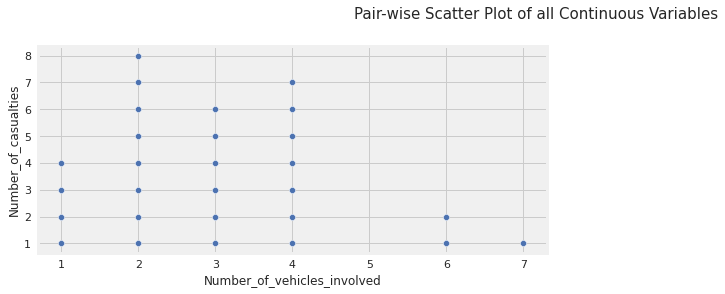

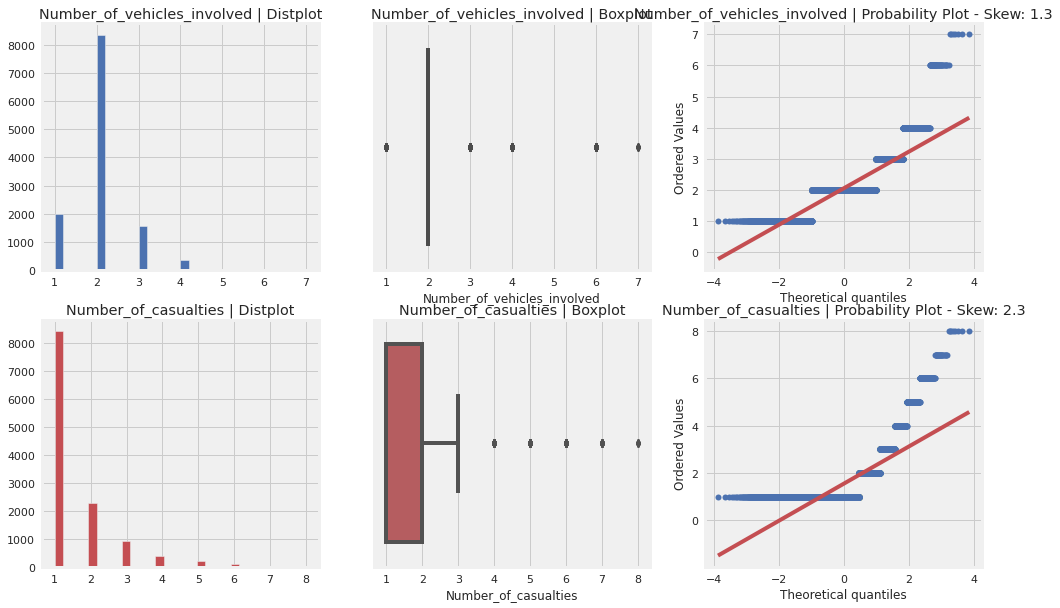

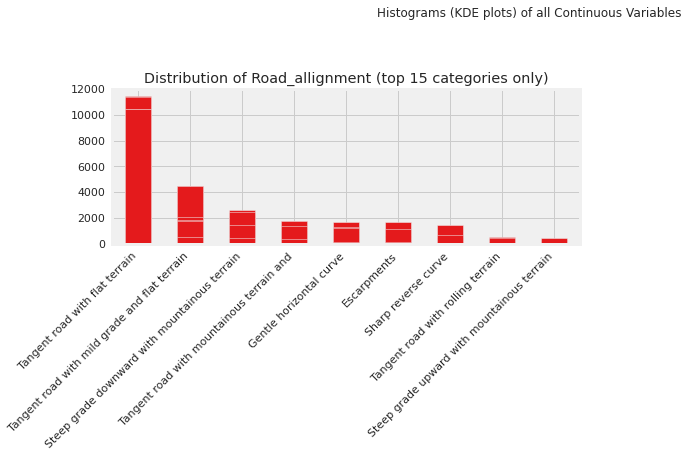

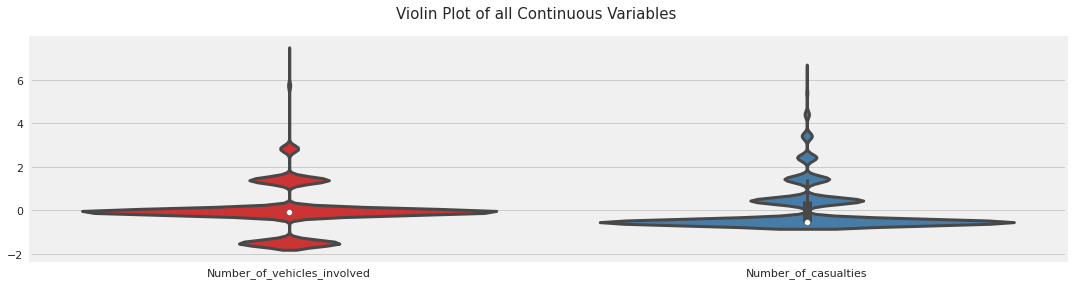

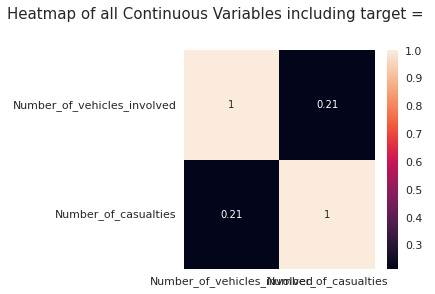

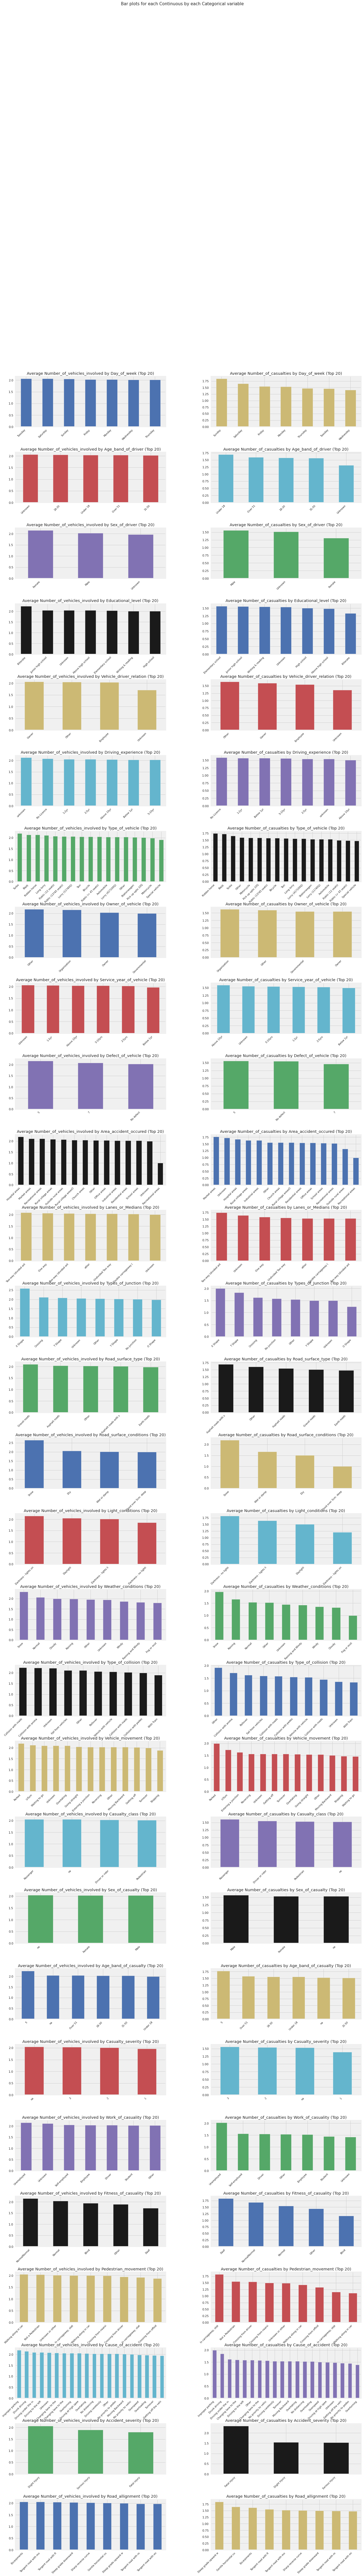

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/hmorales/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/hmorales/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/hmorales/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/hmorales/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/hmorales/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/hmorales/nltk_data...
[nltk_data]    |   Package movie_reviews is a

Could not draw wordcloud plot for Time
All Plots done
Time to run AutoViz = 29 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
0               Automobile            Owner              Above 10yr  ...   
1      Public (> 45 seats)            Owner                 5-10yrs  ...   
2          Lorry (41?100Q)            Owner                     NaN  ...   
3      Public (> 45 seats)     Governmental                     NaN  ...   
4                      NaN            Owner                 5-10yrs  ...   
...                    ...              ...                     ...  ...   
12311       Lorry (11?40Q)            Owner                     NaN  ...   
12312           Automobile            Owner                     NaN  ...   
12313                Bajaj            Owner                  2-5yrs  ...   
12314      Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315                Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
0       Going straight               na              na                   na   
1       Going straight               na              na                   na   
2       Going straight  Driver or rider            Male                31-50   
3       Going straight       Pedestrian          Female                18-30   
4       Going straight               na              na                   na   
...                ...              ...             ...                  ...   
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
0                    na               NaN                  NaN   
1                    na               NaN                  NaN   
2                     3            Driver                  NaN   
3                     3            Driver               Normal   
4                    na               NaN                  NaN   
...                 ...               ...                  ...   
12311                na            Driver

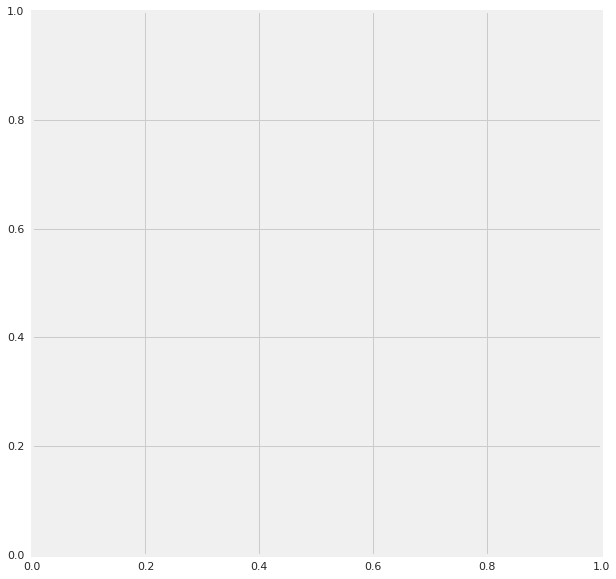

In [15]:
AV.AutoViz('../datasets/RTA Dataset.csv', sep=',', depVar='', dfte=df, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=15000,max_cols_analyzed=60)

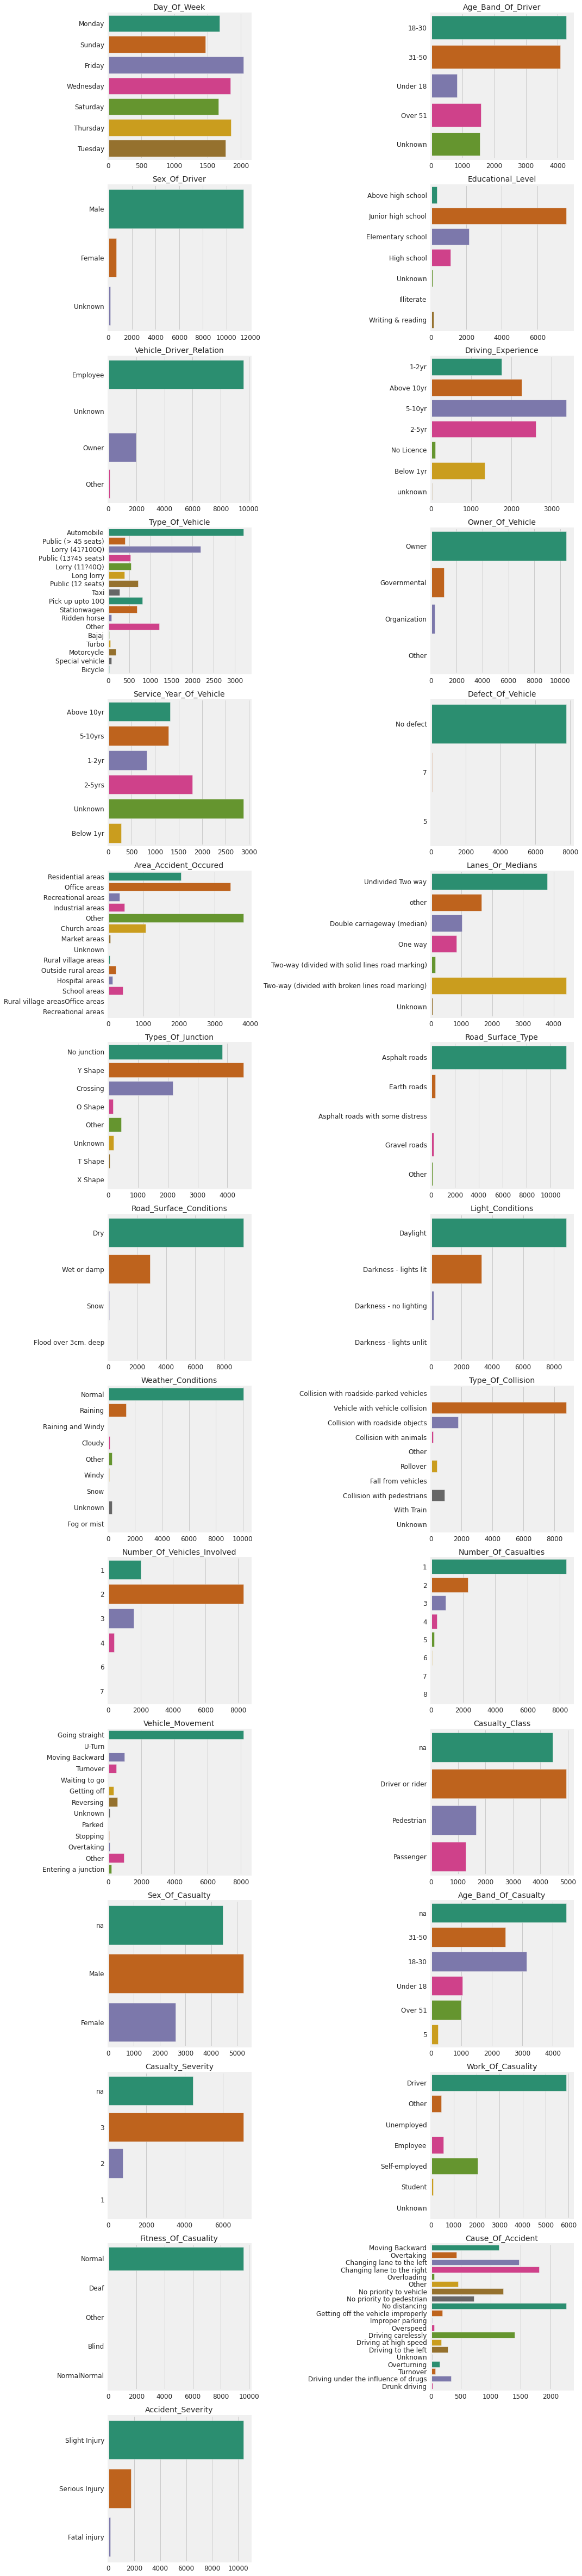

In [16]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['time_hours', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

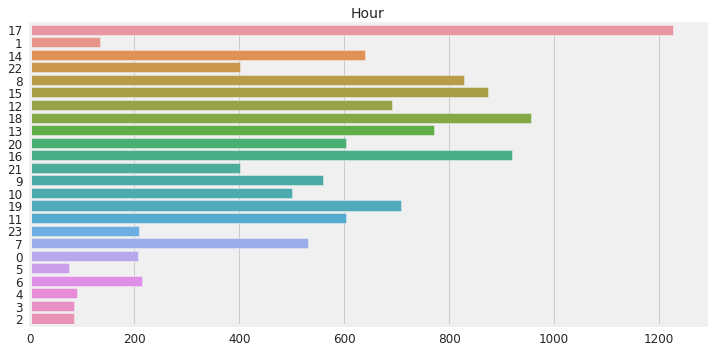

In [17]:
#show number of accidents by hour
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='time_hours')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

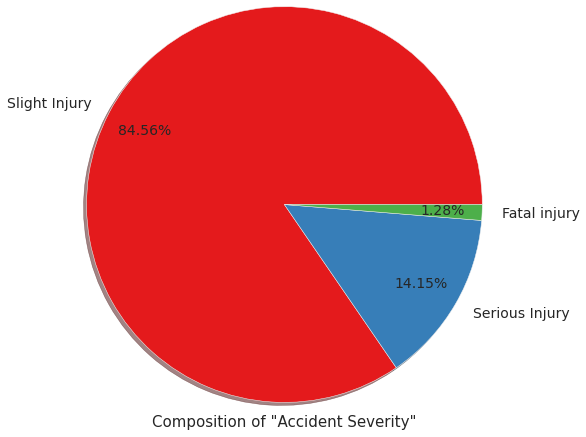

In [18]:
#and now the target variable: Accident_severity
plt.figure(figsize=(14,7))
# pieplot
ax = plt.subplot()
plt.pie(df["accident_severity"].value_counts(),
        labels=list(df["accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

<hr>
<h2>Conclutions of analysis</h2>
<hr>

1. Two vehicules involved are the most frecuent type of accident
2. Accidents with two vehicules have more casualities than others
3. the most accidents occurs in a tangent road with flat terrain
4. The most common cause of an accident is no distance between vehicles and changing lane.
5. Most of the accidents occurs when the vehicle is going straight, what support  the previous conclusion.
6. Most of the accidents occurs from thurdays to friday, not on weekends, as I guessed.
7. Wheather doesn't seem to be a commen cause of accident, most of them occurs on dry roads and normal weather.
8. night is not a common cause of accidents, most of them occurs during daylight, 1700 hours is the peak. 

<hr>
<h2>Hypotesis</h2>
<hr>

In [20]:
df_hyp = df.copy(deep=True)

<h3><b>Myth 1.</b> Women causes more accidents than men</h3>

In [21]:
((df_hyp.groupby(['sex_of_driver']).size() / df_hyp["sex_of_driver"].count()) * 100).add_prefix('Accidents(in %) Caused by ')

sex_of_driver
Accidents(in %) Caused by Female      5.691783
Accidents(in %) Caused by Male       92.862943
Accidents(in %) Caused by Unknown     1.445274
dtype: float64

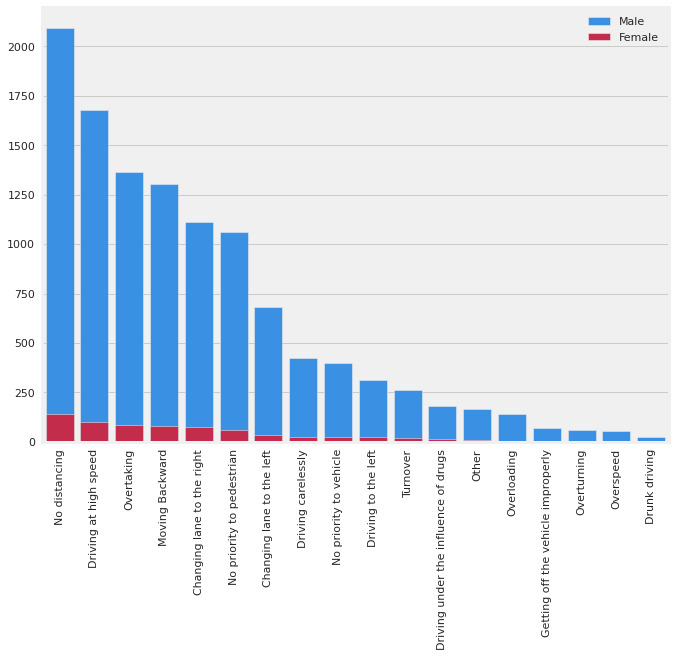

In [22]:
plt.figure(figsize=(10,8))
male_df = df_hyp.loc[df_hyp.sex_of_driver == 'Male']
female_df = df_hyp.loc[df_hyp.sex_of_driver == 'Female']
sns.barplot(data=male_df,x = male_df.cause_of_accident.unique(),y = male_df.cause_of_accident.value_counts().values,color='dodgerblue', label="Male")
sns.barplot(data=female_df,x = female_df.cause_of_accident.unique(),y = female_df.cause_of_accident.value_counts().values,color='crimson', label="Female")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [23]:
table = pd.crosstab(index=df_hyp['sex_of_driver'].loc[df_hyp['sex_of_driver'] !="unknown"], columns=df['accident_severity']
                 , margins=True)
table

accident_severity  Fatal injury  Serious Injury  Slight Injury    All
sex_of_driver                                                        
Female                        5             104            592    701
Male                        152            1621           9664  11437
Unknown                       1              18            159    178
All                         158            1743          10415  12316

In [24]:
print("P(Gender = Female | Severity = Fatal) = " + str((table.iloc[0,0])/(table.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Fatal) = " + str((table.iloc[1,0])/(table.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Serious Injury) = " + str((table.iloc[0,1])/(table.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Serious Injury) = " + str((table.iloc[1,1])/(table.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Slight Injury) = " + str((table.iloc[0,2])/(table.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Slight Injury) = " + str((table.iloc[1,2])/(table.iloc[1,3]*1.0)*100) + '%')

P(Gender = Female | Severity = Fatal) = 0.7132667617689016%
P(Gender = Male | Severity = Fatal) = 1.3290198478622017%

P(Gender = Female | Severity = Serious Injury) = 14.835948644793154%
P(Gender = Male | Severity = Serious Injury) = 14.173297193319925%

P(Gender = Female | Severity = Slight Injury) = 84.45078459343794%
P(Gender = Male | Severity = Slight Injury) = 84.49768295881788%


We can conclude both gendes have almost the same probability to be involve in an accident, no matter the severity. so the myth is not true

<h3><b>Myth 2.</b> Youngers has more accidents that older ones</h3>

In [25]:
((df_hyp.groupby(['age_band_of_driver']).size() / df_hyp["age_band_of_driver"].count()) * 100).add_prefix('Accidents(in %) Caused by ')

age_band_of_driver
Accidents(in %) Caused by 18-30       34.678467
Accidents(in %) Caused by 31-50       33.184475
Accidents(in %) Caused by Over 51     12.869438
Accidents(in %) Caused by Under 18     6.698603
Accidents(in %) Caused by Unknown     12.569016
dtype: float64

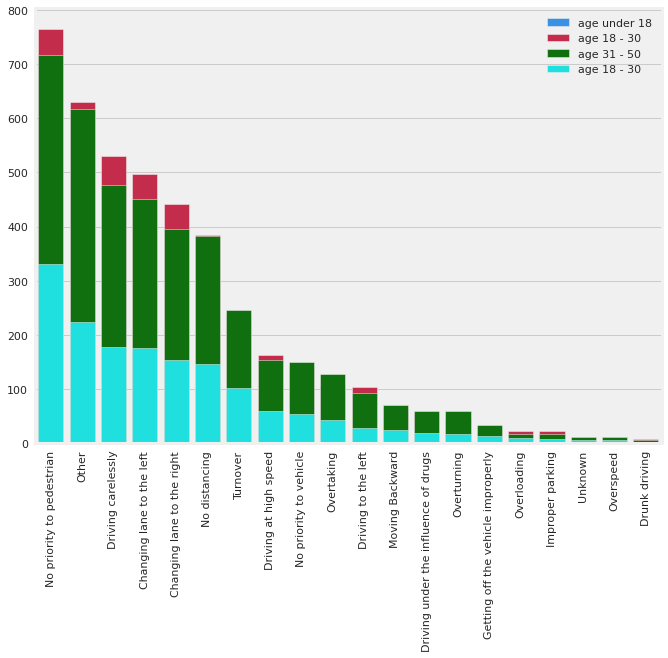

In [26]:
plt.figure(figsize=(10,8))
df_18_30 = df_hyp.loc[df_hyp.age_band_of_driver == '18-30']
df_31_50 = df_hyp.loc[df_hyp.age_band_of_driver == '31-50']
df_over51 = df_hyp.loc[df_hyp.age_band_of_driver == 'Over 51']
df_under18 = df_hyp.loc[df_hyp.age_band_of_driver == 'Under 18']
sns.barplot(data=df_under18,x = df_under18.cause_of_accident.unique(),y = df_under18.cause_of_accident.value_counts().values,color='dodgerblue', label="age under 18")
sns.barplot(data=df_18_30,x = df_18_30.cause_of_accident.unique(),y = df_18_30.cause_of_accident.value_counts().values,color='crimson', label="age 18 - 30")
sns.barplot(data=df_31_50,x = df_31_50.cause_of_accident.unique(),y = df_31_50.cause_of_accident.value_counts().values,color='green', label="age 31 - 50")
sns.barplot(data=df_over51,x = df_over51.cause_of_accident.unique(),y = df_over51.cause_of_accident.value_counts().values,color='cyan', label="age 18 - 30")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [27]:
table = pd.crosstab(index=df_hyp['age_band_of_driver'].loc[df_hyp['age_band_of_driver'] !="Unknown"], columns=df['accident_severity']
                 , margins=True)
table

accident_severity   Fatal injury  Serious Injury  Slight Injury    All
age_band_of_driver                                                    
18-30                         62             604           3605   4271
31-50                         54             541           3492   4087
Over 51                       24             257           1304   1585
Under 18                      12             169            644    825
All                          152            1571           9045  10768

In [28]:
print("P(Age = under 18 | Severity = Fatal) = " + str((table.iloc[3,0])/(table.iloc[3,3]*1.0)*100) + '%')
print("P(Age = 18 to 30 | Severity = Fatal) = " + str((table.iloc[0,0])/(table.iloc[0,3]*1.0)*100) + '%')
print("P(Age = 31 to 50 | Severity = Fatal) = " + str((table.iloc[1,0])/(table.iloc[1,3]*1.0)*100) + '%')
print("P(Age = over 51 | Severity = Fatal) = " + str((table.iloc[2,0])/(table.iloc[2,3]*1.0)*100) + '%\n')

print("P(Age = under 18 | Severity = Serious Injury) = " + str((table.iloc[3,1])/(table.iloc[3,3]*1.0)*100) + '%')
print("P(Age = 18 to 30 | Severity = Serious Injury) = " + str((table.iloc[0,1])/(table.iloc[0,3]*1.0)*100) + '%')
print("P(Age = 31 to 50 | Severity = Serious Injury) = " + str((table.iloc[1,1])/(table.iloc[1,3]*1.0)*100) + '%')
print("P(Age = over 51 | Severity = Serious Injury) = " + str((table.iloc[2,1])/(table.iloc[2,3]*1.0)*100) + '%\n')

print("P(Age = under 18 | Severity = Slight Injury) = " + str((table.iloc[3,2])/(table.iloc[3,3]*1.0)*100) + '%')
print("P(Age = 18 to 30 | Severity = Slight Injury) = " + str((table.iloc[0,2])/(table.iloc[0,3]*1.0)*100) + '%')
print("P(Age = 31 to 50 | Severity = Slight Injury) = " + str((table.iloc[1,2])/(table.iloc[1,3]*1.0)*100) + '%')
print("P(Age = over 51 | Severity = Slight Injury) = " + str((table.iloc[2,2])/(table.iloc[2,3]*1.0)*100) + '%\n')

P(Age = under 18 | Severity = Fatal) = 1.4545454545454546%
P(Age = 18 to 30 | Severity = Fatal) = 1.4516506672910325%
P(Age = 31 to 50 | Severity = Fatal) = 1.3212625397602153%
P(Age = over 51 | Severity = Fatal) = 1.5141955835962144%

P(Age = under 18 | Severity = Serious Injury) = 20.484848484848484%
P(Age = 18 to 30 | Severity = Serious Injury) = 14.141887145867479%
P(Age = 31 to 50 | Severity = Serious Injury) = 13.237093222412527%
P(Age = over 51 | Severity = Serious Injury) = 16.214511041009462%

P(Age = under 18 | Severity = Slight Injury) = 78.06060606060606%
P(Age = 18 to 30 | Severity = Slight Injury) = 84.4064621868415%
P(Age = 31 to 50 | Severity = Slight Injury) = 85.44164423782725%
P(Age = over 51 | Severity = Slight Injury) = 82.27129337539432%



Despite on number of accidents, we can conclude that youngers have more probability to be involve in a serious accident than people from another ages.

<h3><b>Myth 6.</b> Accidents at night are more dangerous than during the daylight.</h3>

In [30]:
table = pd.crosstab(index=df_hyp['light_conditions'], columns=df_hyp['accident_severity'], margins=True)
pd.crosstab(index=df_hyp['light_conditions'], columns=df_hyp['accident_severity'], margins=True)
table

accident_severity        Fatal injury  Serious Injury  Slight Injury    All
light_conditions                                                           
Darkness - lights lit              66             465           2755   3286
Darkness - lights unlit             0               7             33     40
Darkness - no lighting              5              49            138    192
Daylight                           87            1222           7489   8798
All                               158            1743          10415  12316

In [31]:
sol = 0
for i in [0,1]:
    for j in [0,1,2]:
        sol += table.iloc[j,i]

r = sol/(sum(table.iloc[i,3] for i in [0,1,2]))
print('Dangerous injuries at night:',round(r,2),'%')
r = sum(table.iloc[i,2] for i in [0,1,2])/sum(table.iloc[i,3] for i in [0,1,2])
print('Slight injuries at night:',round(r,2),'%')

Dangerous injuries at night: 0.17 %
Slight injuries at night: 0.83 %


In [32]:
r = sum(table.iloc[3,i] for i in [0,1])/table.iloc[3,3]
print('Dangerous injuries at day:',round(r,2),'%')
r = table.iloc[3,2]/table.iloc[3,3]
print('Slight injuries at day:',round(r,2),'%')

Dangerous injuries at day: 0.15 %
Slight injuries at day: 0.85 %


Despite of the fact there are more accidents during the day, the probability to result with more dangerous injuries is higher during the night

In [20]:
#save the resultant dataset 
df.to_csv('../datasets/RTA Dataset_preprocessing.csv')